# União entre dois CSV's

In [1]:
import os
os.getcwd( )

os.chdir('C:\\data')

In [2]:
import datetime
import numpy as np
import pandas as pd
import random
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
## for explainer
from lime import lime_tabular
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('new_df.csv',sep=",")

In [4]:
df_grande=pd.read_csv('df_grande_final.csv',sep=",")

In [5]:
df_grande.head(6)

,PlayerName,Tournament,Location,Date,Ground,GameRound,GameRank,Oponent,WL,Score,Score_Sets,Sets,Start_Date,End_Date,Year,PlayerName_RecentPerformance,Oponent_RecentPerformance,PlayerName_LastTimePlayed,Oponent_LastTimePlayed,H2H
0,Adli El Shafei,Wimbledon,"London, Great Britain",1946.06.24 - 1946.07.05,Grass,Round of 64,-,R.W. Baker,W,63 62 62,63-62-62,3,1946-06-24,1946-07-05,1946,2.0,3.0,NaN,NaN,2.0
1,Adli El Shafei,French Championships,"Paris, France",1946.07.15 - 1946.07.28,Clay,Round of 64,-,Stanley Drobac,W,62 61 60,62-61-60,3,1946-07-15,1946-07-28,1946,2.0,3.0,21.0,NaN,2.0
2,Adli El Shafei,French Championships,"Paris, France",1948.05.17 - 1948.05.30,Clay,Round of 64,-,Subba Sawhney,W,62 86 61,62-86-61,3,1948-05-17,1948-05-30,1948,2.0,3.0,1.0,NaN,3.0
3,Adli El Shafei,French Championships,"Paris, France",1948.05.17 - 1948.05.30,Clay,Round of 128,-,Jean Hugron,W,61 62 61,61-62-61,3,1948-05-17,1948-05-30,1948,2.0,3.0,0.0,NaN,2.0
4,Adli El Shafei,French Championships,"Paris, France",1950.05.15 - 1950.06.04,Clay,Round of 128,-,Jacob Buntmann,W,75 64 63,75-64-63,3,1950-05-15,1950-06-04,1950,2.0,3.0,728.0,NaN,2.0
5,Adli El Shafei,Wimbledon,"London, Great Britain",1951.06.25 - 1951.07.06,Grass,Round of 128,-,Andre Kalman,W,64 64 64,64-64-64,3,1951-06-25,1951-07-06,1951,2.0,3.0,406.0,NaN,2.0


In [5]:
merged_df = df.merge(df_grande[['Start_Date', 'PlayerName', 'Oponent', 'PlayerName_RecentPerformance', 'Oponent_RecentPerformance']],
                     on=['Start_Date', 'PlayerName', 'Oponent'],
                     how='left')

df['PlayerName_RecentPerformance'] = merged_df['PlayerName_RecentPerformance']
df['Oponent_RecentPerformance'] = merged_df['Oponent_RecentPerformance']

In [7]:
merged_df = df.merge(df_grande[['Start_Date', 'PlayerName', 'Oponent', 'PlayerName_RecentPerformance2', 'Oponent_RecentPerformance2']],
                     on=['Start_Date', 'PlayerName', 'Oponent'],
                     how='left')

df['PlayerName_RecentPerformance2'] = merged_df['PlayerName_RecentPerformance2']
df['Oponent_RecentPerformance2'] = merged_df['Oponent_RecentPerformance2']

In [8]:
merged_df = df.merge(df_grande[['Start_Date', 'PlayerName', 'Oponent', 'PlayerName_LastTimePlayed', 'Oponent_LastTimePlayed']],
                     on=['Start_Date', 'PlayerName', 'Oponent'],
                     how='left')

df['PlayerName_LastTimePlayed'] = merged_df['PlayerName_LastTimePlayed']
df['Oponent_LastTimePlayed'] = merged_df['Oponent_LastTimePlayed']


In [9]:
merged_df = df.merge(df_grande[['Start_Date', 'PlayerName', 'Oponent', 'H2H']],
                     on=['Start_Date', 'PlayerName', 'Oponent'],
                     how='left')

df['H2H'] = merged_df['H2H']

In [10]:
merged_df = df.merge(df_grande[['Start_Date', 'PlayerName', 'Oponent', 'H2H_Median']],
                     on=['Start_Date', 'PlayerName', 'Oponent'],
                     how='left')

df['H2H_Median'] = merged_df['H2H_Median']

In [11]:
df.isna().sum()

PlayerName                                0
Born                                   1098
Height                                 2174
Hand                                   1079
LinkPlayer                                0
Tournament                                0
Date                                      0
Ground                                    0
Prize                                     0
GameRound                                 0
OponentRank                               0
Oponent                                   0
WL                                        0
Score                                     0
Location                                  0
PlayerRank                                0
OverviewLink                              0
BornDate                                  0
OponentBornDate                           0
Ranking_Diff                              0
TournamentType                            0
Score_Sets                                0
Sets                            

In [23]:
count_nan_last_time_played = df[df['PlayerName_LastTimePlayed'].isna() & df['Oponent_LastTimePlayed'].isna()]['Sets'].value_counts()
print(count_nan_last_time_played)

2    17
3     5
Name: Sets, dtype: int64


In [21]:
df.isna().sum()

PlayerName                                0
Born                                   1098
Height                                 2174
Hand                                   1079
LinkPlayer                                0
Tournament                                0
Date                                      0
Ground                                    0
Prize                                     0
GameRound                                 0
OponentRank                               0
Oponent                                   0
WL                                        0
Score                                     0
Location                                  0
PlayerRank                                0
OverviewLink                              0
BornDate                                  0
OponentBornDate                           0
Ranking_Diff                              0
TournamentType                            0
Score_Sets                                0
Sets                            

In [15]:
df[df['PlayerName_LastTimePlayed'].isna()]

,PlayerName,Born,Height,Hand,LinkPlayer,Tournament,Date,Ground,Prize,GameRound,...,Tournament_Year,Conversion,Present_Prize,Tiebreak,Tournament_Encoded,PlayerName_RecentPerformance,Oponent_RecentPerformance,PlayerName_LastTimePlayed,Oponent_LastTimePlayed,H2H
39,Chun-hsin Tseng,Chinese Taipei,175.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/chun-hsin-t...,Chinese Taipei F3,2016.10.24 - 2016.10.30,Hard,10000,Round of 32,...,2016,1.26,12600.0,0,4,2.0,2.0,NaN,7.0,2.0
266,Tsung-Hao Huang,China,NaN,NaN,https://www.atptour.com/en/players/tsung-hao-h...,China F9,2018.07.02 - 2018.07.08,Hard,25000,Round of 32,...,2018,1.21,30250.0,0,4,2.0,2.0,NaN,28.0,2.0
330,Yuanfeng Li,China,NaN,"Left-Handed, Unknown Backhand",https://www.atptour.com/en/players/yuanfeng-li...,Beijing,2013.07.08 - 2013.07.14,Hard,75000,1st Round Qualifying,...,2013,1.30,97500.0,0,2,2.0,2.0,NaN,NaN,2.0
400,William Ma,NaN,183.0,"Right-Handed, One-Handed Backhand",https://www.atptour.com/en/players/william-ma/...,China F8,2018.06.04 - 2018.06.10,Hard,25000,Round of 32,...,2018,1.21,30250.0,0,4,2.0,2.0,NaN,700.0,2.0
405,Zhao Zhao,China,NaN,"Right-Handed, Unknown Backhand",https://www.atptour.com/en/players/zhao-zhao/z...,M25 Yinchuan,2019.06.24 - 2019.06.30,Hard,25000,Round of 32,...,2019,1.19,29750.0,0,4,2.0,2.0,NaN,259.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,Adam Pavlasek,Czech Republic,185.0,"Right-Handed, Two-Handed Backhand",https://www.atptour.com/en/players/adam-pavlas...,Shenzhen,2016.03.21 - 2016.03.27,Hard,75000,Round of 32,...,2016,1.26,94500.0,1,2,2.0,2.0,NaN,NaN,2.0
12363,Cheong-Eui Kim,South Korea,NaN,NaN,https://www.atptour.com/en/players/cheong-eui-...,Shenzhen,2018.03.12 - 2018.03.18,Hard,75000,1st Round Qualifying,...,2018,1.21,90750.0,1,2,2.0,2.0,NaN,7.0,2.0
12519,Cing-Yang Meng,Taiwan,175.0,NaN,https://www.atptour.com/en/players/cing-yang-m...,M15 Anning,2018.12.31 - 2019.01.06,Clay,15000,Quarter-Finals,...,2018,1.21,18150.0,0,4,2.0,2.0,NaN,273.0,2.0
12650,Hong Kit Wong,China,NaN,NaN,https://www.atptour.com/en/players/hong-kit-wo...,M25 Wuhan,2019.05.06 - 2019.05.12,Hard,25000,Round of 32,...,2019,1.19,29750.0,1,4,2.0,2.0,NaN,14.0,2.0


In [29]:
df[df['PlayerName_LastTimePlayed'].isna()]['Sets'].value_counts()

2    97
3    27
Name: Sets, dtype: int64

In [24]:
df["H2H"].unique()

array([2., 3.])

In [27]:
df["H2H"].value_counts()

2.0    12048
3.0      660
Name: H2H, dtype: int64

In [28]:
df[df['Oponent_LastTimePlayed'].isna()]['Sets'].value_counts()

2    323
3     61
Name: Sets, dtype: int64

In [30]:
df['TimeDifference'] = np.abs(df['PlayerName_LastTimePlayed'] - df['Oponent_LastTimePlayed'])

# Replace NaN values with 9999
df['TimeDifference'].fillna(9999, inplace=True)

In [31]:
intervals = [0, 15, 31, 61,float('inf')]

# Define the corresponding labels for the intervals
labels = ['[0,14]', '[15,30]', '[31,60]', '>60']

# Create a new column 'age_difference_interval' based on the intervals
df['TimeDifference_Interval'] = pd.cut(df['TimeDifference'], bins=intervals, labels=labels, right=False)

In [32]:
encoder = LabelEncoder()
df["TimeDifference_Interval_Encoded"] = encoder.fit_transform(df["TimeDifference_Interval"])

In [33]:
encoder = LabelEncoder()
df["PlayerName_RecentPerformance_Encoded"] = encoder.fit_transform(df["PlayerName_RecentPerformance2"])

In [34]:
encoder = LabelEncoder()
df["Oponent_RecentPerformance_Encoded"] = encoder.fit_transform(df["Oponent_RecentPerformance2"])

In [35]:
encoder = LabelEncoder()
df["H2H_Encoded"] = encoder.fit_transform(df["H2H"])

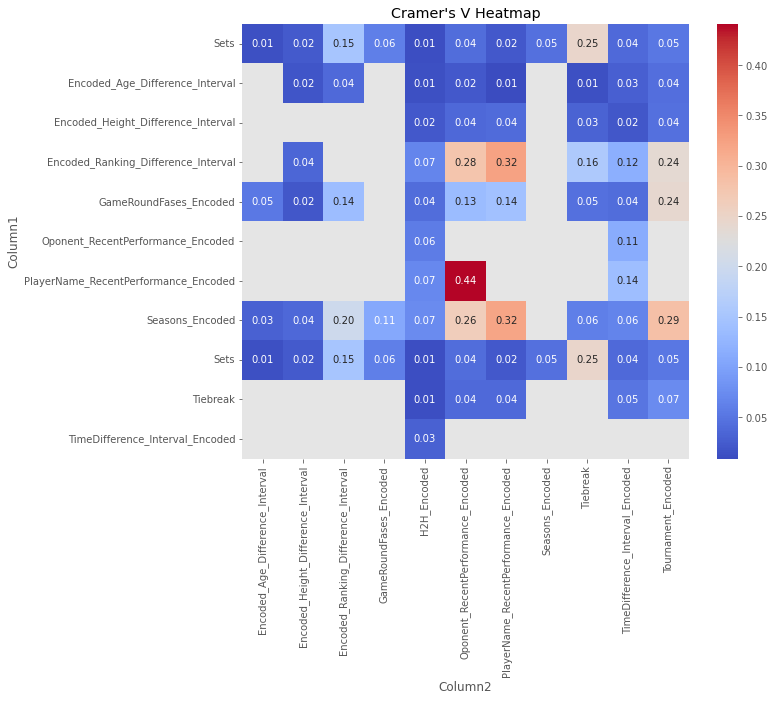

In [36]:
# Create a subset DataFrame with the columns you want to analyze
subset_df = df[["Sets", "Seasons_Encoded", "GameRoundFases_Encoded", "Encoded_Age_Difference_Interval",
               "Encoded_Ranking_Difference_Interval", "Encoded_Height_Difference_Interval",
               "Tiebreak", "Tournament_Encoded","PlayerName_RecentPerformance_Encoded","Oponent_RecentPerformance_Encoded","TimeDifference_Interval_Encoded","H2H_Encoded"]]

# Calculate the Cramer's V values for each column pair
cramer_v_values = []
for i in range(len(subset_df.columns)):
    for j in range(i+1, len(subset_df.columns)):
        contingency_table = pd.crosstab(subset_df.iloc[:, i], subset_df.iloc[:, j])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi = np.sqrt(chi2 / n)
        r, k = contingency_table.shape
        cramers_v = phi / np.sqrt(min(r - 1, k - 1))
        cramer_v_values.append((subset_df.columns[i], subset_df.columns[j], cramers_v))

# Create a DataFrame with the Cramer's V values
cramer_v_df = pd.DataFrame(cramer_v_values, columns=["Column1", "Column2", "Cramer's V"])

# Create a pivot table for the heatmap
heatmap_data = cramer_v_df.pivot("Column1", "Column2", "Cramer's V")

# Move "Sets" to the first row of the heatmap
heatmap_data = heatmap_data.reindex(["Sets"] + list(heatmap_data.index[:-1]))

# Plot the Cramer's V heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cramer's V Heatmap")
plt.show()

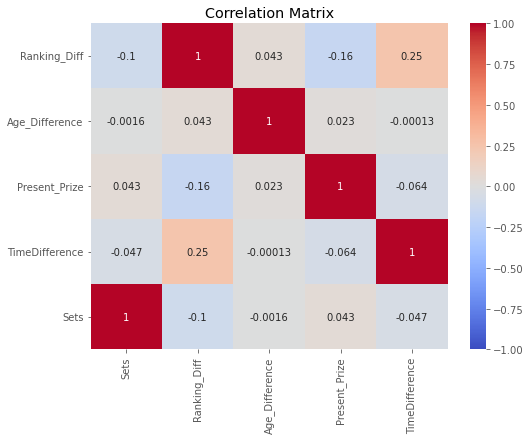

In [43]:
subset_df = df[["Sets", "Ranking_Diff", "Age_Difference", "Present_Prize","TimeDifference"]]

# Calculate the correlations
correlation_matrix = subset_df.corr()

# Move "Sets" to the first row of the correlation matrix
sets_corr = correlation_matrix["Sets"].copy()
correlation_matrix = correlation_matrix.drop("Sets", axis=0)
correlation_matrix = correlation_matrix.append(sets_corr)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [37]:
df.to_csv('df_final_intermedio.csv', index=False)